# 🎯 Objetivo del Proyecto
Desarrollar un sistema de recomendación de playlists personalizadas basado en las características acústicas de las canciones, con el fin de sugerir música alineada al estado emocional del usuario. Esta app representa una primera etapa en la construcción de un generador inteligente de playlists, integrando análisis de datos musicales y clustering no supervisado.

# 🔬 Metodología
1️⃣ Obtención de datos:
El dataset fue obtenido desde [Google Dataset Search](https://datasetsearch.research.google.com/), redirigiendo a una fuente de Kaggle que contenía más de 20.000 canciones con información como valence, energy, danceability, tempo, entre otras variables acústicas.

2️⃣ Preprocesamiento y limpieza:
Se realizó una limpieza del dataset para remover duplicados, valores nulos y verificar la consistencia de los datos.

3️⃣ Análisis exploratorio (EDA):
Se analizaron gráficamente las variables principales para entender su distribución y relación.

Valence mostró una distribución relativamente balanceada.

Energy permitió identificar canciones intensas versus suaves.

Danceability y Tempo se correlacionaron para analizar qué tan bailable y rítmica es una canción.

4️⃣ Modelado con K-Means:
Se utilizó el algoritmo de clustering K-Means para agrupar canciones en distintos "moods" musicales. Esta técnica no supervisada permitió segmentar el dataset según patrones acústicos sin etiquetas previas.

5️⃣ Generación de playlist personalizada:
El usuario selecciona un estado emocional (por ejemplo, feliz, relajado o melancólico) y la aplicación recomienda canciones pertenecientes al cluster correspondiente, alineando la recomendación con las características de audio identificadas.

# Importar librerías

In [3]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from IPython.display import display

# Cargar el dataset

In [5]:
file_path = r"C:\Users\affec\Spotify Dataset\cleaned_dataset.csv"  # Ruta completa del archivo
df = pd.read_csv(file_path)  # Cargar el dataset en un DataFrame

# Primera visualización del dataset

In [7]:
# Mostrar las primeras filas
df.head(50)

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,6.935552e+08,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,7.201164e+07,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8.435055e+06,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,2.117550e+08,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,Gorillaz - Clint Eastwood (Official Video),Gorillaz,6.184810e+08,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube
5,Gorillaz,DARE,Demon Days,album,0.760,0.891,-5.852,0.0372,0.022900,0.086900,...,Gorillaz - DARE (Official Video),Gorillaz,2.590212e+08,1844658.0,72008.0,True,True,3.238503e+08,2.989933,Spotify
6,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,0.716,0.897,-7.185,0.0629,0.012000,0.262000,...,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,4.519960e+05,11686.0,241.0,False,True,1.066615e+07,2.760000,Spotify
7,Gorillaz,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,0.726,0.815,-5.886,0.0313,0.007990,0.081000,...,Gorillaz - She's My Collar [HQ],SalvaMuñox,1.010982e+06,17675.0,260.0,False,False,1.596059e+08,7.276786,Spotify
8,Gorillaz,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,0.741,0.913,-3.340,0.0465,0.003430,0.103000,...,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,2.445982e+07,739527.0,20296.0,True,True,4.267190e+07,2.809231,Spotify
9,Gorillaz,Dirty Harry,Demon Days,album,0.625,0.877,-7.176,0.1620,0.031500,0.081100,...,Gorillaz - Dirty Harry (Official Video),Gorillaz,1.547611e+08,1386920.0,39240.0,True,True,1.910747e+08,1.305060,Spotify


In [8]:
#Ver la cantidad de filas y columnas
df.shape

(20594, 24)

In [9]:
#Obtener información sobre los tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            20594 non-null  object 
 1   Track             20594 non-null  object 
 2   Album             20594 non-null  object 
 3   Album_type        20594 non-null  object 
 4   Danceability      20594 non-null  float64
 5   Energy            20594 non-null  float64
 6   Loudness          20594 non-null  float64
 7   Speechiness       20594 non-null  float64
 8   Acousticness      20594 non-null  float64
 9   Instrumentalness  20594 non-null  float64
 10  Liveness          20594 non-null  float64
 11  Valence           20594 non-null  float64
 12  Tempo             20594 non-null  float64
 13  Duration_min      20594 non-null  float64
 14  Title             20594 non-null  object 
 15  Channel           20594 non-null  object 
 16  Views             20594 non-null  float6

In [10]:
# Ver estadísticas generales de los datos numéricos
df.describe()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_min,Views,Likes,Comments,Stream,EnergyLiveness
count,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,20594.000000,2.059400e+04,2.059400e+04,2.059400e+04,2.059400e+04,20592.000000
mean,0.620102,0.635176,-7.678254,0.096733,0.291391,0.056162,0.193653,0.530077,120.562616,3.742439,9.203740e+07,6.479902e+05,2.684679e+04,1.326446e+08,5.167227
std,0.165504,0.214274,4.639481,0.112182,0.286117,0.193622,0.168832,0.245542,29.588093,2.085211,2.726026e+08,1.773648e+06,1.911751e+05,2.423582e+08,4.117431
min,0.000000,0.000000,-46.251000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000049
25%,0.519000,0.507000,-8.868000,0.035700,0.045200,0.000000,0.094100,0.340000,96.994000,2.996746,1.478284e+06,1.754200e+04,4.060000e+02,1.559098e+07,2.386190
50%,0.638000,0.666000,-6.540500,0.050650,0.193000,0.000002,0.125000,0.538000,119.959000,3.551267,1.331348e+07,1.153155e+05,3.006000e+03,4.730525e+07,4.256881
75%,0.741000,0.798000,-4.935000,0.104000,0.476750,0.000474,0.237000,0.727000,139.923500,4.202163,6.739682e+07,5.000198e+05,1.373675e+04,1.343453e+08,6.822034
max,0.975000,1.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,77.934300,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09,59.113924


# Limpieza y preprocesamiento de datos

In [12]:
# Eliminamos columnas que no aportan al modelo de recomendación
columns_to_drop = ["Title", "Channel"]  
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

# Verificamos las columnas después de la eliminación
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Tempo,Duration_min,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,-6.679,0.1770,0.008360,0.002330,...,138.559,3.710667,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1.150082,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,-5.815,0.0302,0.086900,0.000687,...,92.761,3.336217,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,15.183585,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,-3.930,0.0522,0.042500,0.046900,...,108.014,3.585833,8435055.0,282142.0,7399.0,True,True,6.306347e+07,7.956897,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,-5.810,0.0260,0.000015,0.509000,...,120.423,3.897783,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,11.546875,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,-8.627,0.1710,0.025300,0.000000,...,167.953,5.682000,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,9.942693,Youtube


In [13]:
# Ver cuántos valores nulos hay en cada columna
df.isnull().sum()

# Aplicamos la mediana solo a las columnas numéricas
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)

# Verificamos que no haya valores nulos
df.isnull().sum()

Artist              0
Track               0
Album               0
Album_type          0
Danceability        0
Energy              0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_min        0
Views               0
Likes               0
Comments            0
Licensed            0
official_video      0
Stream              0
EnergyLiveness      0
most_playedon       0
dtype: int64

In [14]:
# Convertimos variables categóricas en formato "category"
categorical_columns = ["Album_type", "Licensed", "official_video", "most_playedon"]
for col in categorical_columns:
    df[col] = df[col].astype("category")

# Verificamos los cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Artist            20594 non-null  object  
 1   Track             20594 non-null  object  
 2   Album             20594 non-null  object  
 3   Album_type        20594 non-null  category
 4   Danceability      20594 non-null  float64 
 5   Energy            20594 non-null  float64 
 6   Loudness          20594 non-null  float64 
 7   Speechiness       20594 non-null  float64 
 8   Acousticness      20594 non-null  float64 
 9   Instrumentalness  20594 non-null  float64 
 10  Liveness          20594 non-null  float64 
 11  Valence           20594 non-null  float64 
 12  Tempo             20594 non-null  float64 
 13  Duration_min      20594 non-null  float64 
 14  Views             20594 non-null  float64 
 15  Likes             20594 non-null  float64 
 16  Comments          2059

In [15]:
# Definimos las columnas numéricas
numerical_columns = ["Danceability", "Energy", "Loudness", "Speechiness", "Acousticness",
                     "Instrumentalness", "Liveness", "Valence", "Tempo", "Duration_min",
                     "Views", "Likes", "Comments", "Stream", "EnergyLiveness"]

# Aplicamos MinMaxScaler para normalizar entre 0 y 1
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verificamos el resultado
df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,...,Tempo,Duration_min,Views,Likes,Comments,Licensed,official_video,Stream,EnergyLiveness,most_playedon
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.838974,0.705,0.838905,0.183610,0.008394,0.002330,...,0.569330,0.047613,0.085840,0.122486,0.010564,True,True,0.307169,0.019455,Spotify
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.693333,0.703,0.857222,0.031328,0.087249,0.000687,...,0.381149,0.042808,0.008913,0.021247,0.001928,True,True,0.091564,0.256852,Spotify
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.712821,0.923,0.897183,0.054149,0.042671,0.046900,...,0.443823,0.046011,0.001044,0.005555,0.000460,True,True,0.018622,0.134602,Spotify
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.706667,0.739,0.857328,0.026971,0.000015,0.509000,...,0.494810,0.050014,0.026208,0.035216,0.003434,True,True,0.128351,0.195332,Spotify
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.680000,0.694,0.797609,0.177386,0.025402,0.000000,...,0.690108,0.072908,0.076548,0.122022,0.009695,True,True,0.182270,0.168195,Youtube


# Análisis Exploratorio de Datos (EDA)

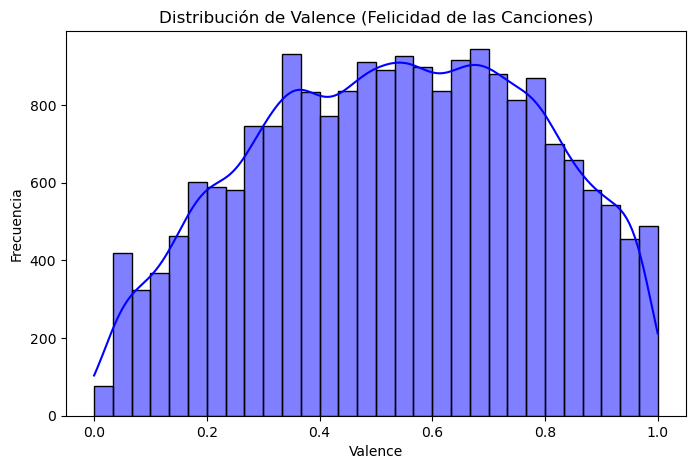

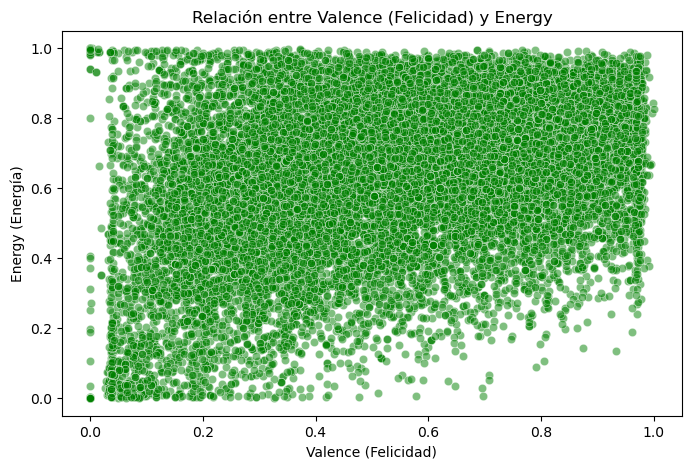

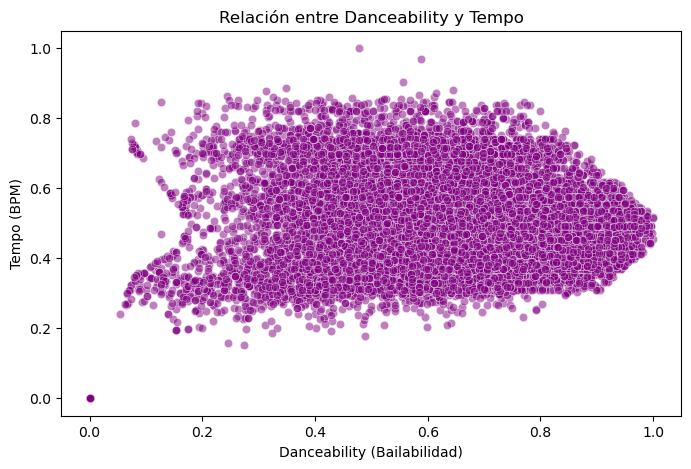

In [17]:
# Distribución de Valence (¿Qué tan felices son las canciones?)
plt.figure(figsize=(8,5))
sns.histplot(df["Valence"], bins=30, kde=True, color="blue")
plt.title("Distribución de Valence (Felicidad de las Canciones)")
plt.xlabel("Valence")
plt.ylabel("Frecuencia")
plt.show()

# Relación entre Energy y Valence (¿Las canciones felices son más energéticas?)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Valence"], y=df["Energy"], alpha=0.5, color="green")
plt.title("Relación entre Valence (Felicidad) y Energy")
plt.xlabel("Valence (Felicidad)")
plt.ylabel("Energy (Energía)")
plt.show()

# Relación entre Danceability y Tempo (¿Las canciones bailables tienen tempos más rápidos?)
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Danceability"], y=df["Tempo"], alpha=0.5, color="purple")
plt.title("Relación entre Danceability y Tempo")
plt.xlabel("Danceability (Bailabilidad)")
plt.ylabel("Tempo (BPM)")
plt.show()

# 📊 Análisis de los Gráficos:

1️⃣ Distribución de Valence (Felicidad de las Canciones)

Valence mide cuán positiva o feliz es una canción.
La distribución parece bastante balanceada, con una mayor densidad en valores intermedios (~0.5-0.7).
Nos indica que hay una variedad de canciones tanto felices como más melancólicas en el dataset.

2️⃣ Relación entre Valence y Energy

Energy mide la intensidad y potencia de la canción.
No hay una clara relación lineal entre ambos, pero se observa que hay canciones con alta energía en distintos niveles de felicidad.
Esto es útil para diferenciar estados emocionales en las recomendaciones.

3️⃣ Relación entre Danceability y Tempo

Danceability mide qué tan fácil es bailar con la canción.
Tempo (BPM) afecta la percepción de ritmo.
Se observa una mayor concentración en tempos intermedios, lo que sugiere que muchas canciones bailables están en un rango medio de BPM.

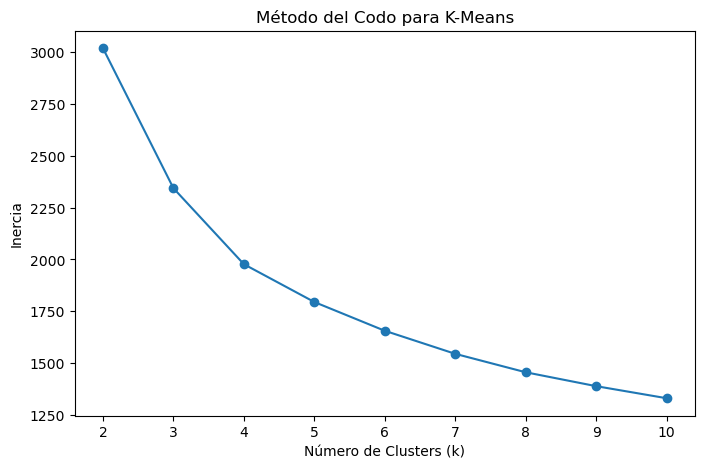

In [19]:
# 1️⃣ Seleccionamos las características clave
features = ['Valence', 'Energy', 'Danceability', 'Tempo', 'Acousticness']
X = df[features]

# 2️⃣ Escalamos los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 3️⃣ Determinamos el número óptimo de clusters con el método del codo
inertia = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 4️⃣ Graficamos el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-Means')
plt.show()

# Usar K-Means para generar clusters

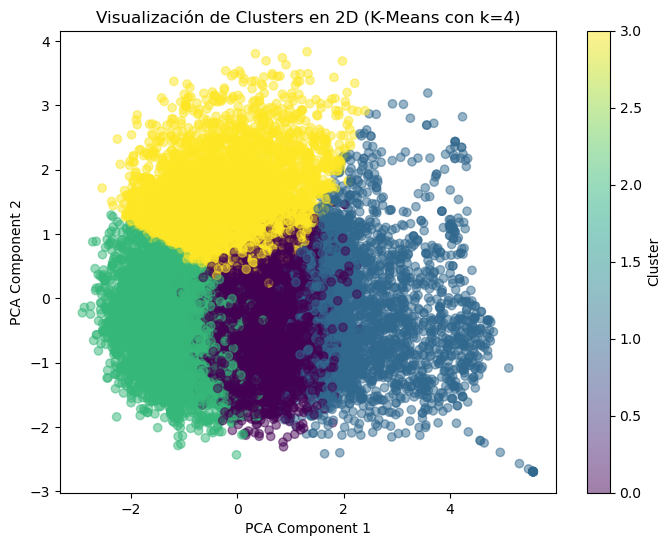

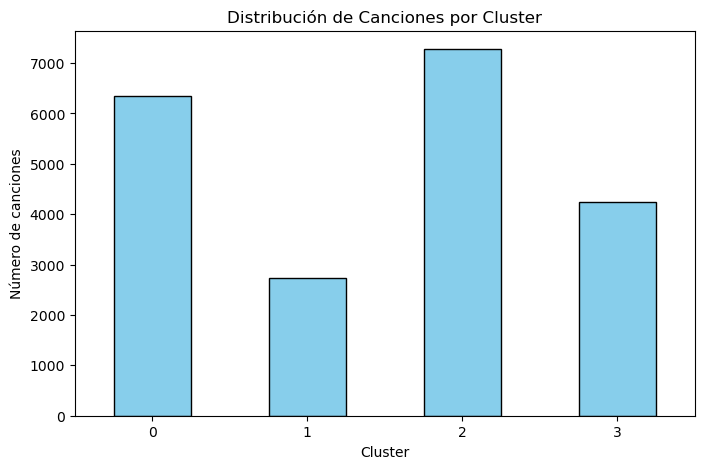

Distribución de canciones por cluster:
Cluster
2    7277
0    6340
3    4247
1    2730
Name: count, dtype: int64


In [21]:
# Aseguramos que los datos usados sean del dataset real
columnas_para_clustering = ['Danceability', 'Energy', 'Valence', 'Tempo']
df_clustering = df[columnas_para_clustering].copy()

# Escalar los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicamos K-Means con k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Reducimos la dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Visualización de los clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label="Cluster")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Visualización de Clusters en 2D (K-Means con k=4)")
plt.show()

# Mostrar el número de canciones en cada cluster
cluster_counts = df['Cluster'].value_counts()

# Visualización de la cantidad de canciones por cluster
plt.figure(figsize=(8,5))
cluster_counts.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Cluster")
plt.ylabel("Número de canciones")
plt.title("Distribución de Canciones por Cluster")
plt.xticks(rotation=0)
plt.show()

# También podemos imprimir los valores de la distribución
print("Distribución de canciones por cluster:")
print(cluster_counts)

In [22]:
# Verificar cómo se distribuyen las características de audio en cada cluster
cluster_analysis = df.groupby('Cluster')[['Danceability', 'Energy', 'Valence', 'Tempo']].mean()

# Mostrar la tabla con un mejor formato
display(cluster_analysis)

,Danceability,Energy,Valence,Tempo
Cluster,,,,
0,0.647258,0.641697,0.386104,0.440318
1,0.417309,0.281711,0.238996,0.443637
2,0.757775,0.713355,0.759228,0.465228
3,0.551124,0.718695,0.557593,0.662523


# Generar la playlist personalizada

In [24]:
# Diccionario de emociones y su cluster asociado
emocion_a_cluster = {
    "felicidad": 2,   # 🎉 Canciones alegres y bailables
    "fiesta": 2,      # 🎉 Similar a felicidad
    "motivación": 3,  # 🎸 Canciones con energía alta
    "intensidad": 3,  # 🎸 Similar a motivación
    "relajación": 1,  # 🌙 Música tranquila y relajante
    "tristeza": 1,    # 🌙 Similar a relajación
    "balance": 0,     # 🎵 Canciones equilibradas
    "concentración": 0 # 🎵 Música neutra y sin distracciones
}

In [60]:
# Función para generar una playlist personalizada según la emoción ingresada
def generar_playlist(emocion, num_canciones=10):
    if emocion not in emocion_a_cluster:
        print("⚠️ Emoción no reconocida. Usa una de estas:", list(emocion_a_cluster.keys()))
        return None

    # Obtener el cluster correspondiente a la emoción
    cluster_id = emocion_a_cluster[emocion]
    
    # Filtrar canciones del cluster correspondiente
    canciones_cluster = df[df["Cluster"] == cluster_id]
    
    # Verificar si hay suficientes canciones
    if len(canciones_cluster) == 0:
        print(f"⚠️ No hay canciones disponibles para la emoción '{emocion}'.")
        return None

    # Seleccionar canciones aleatorias
    playlist = canciones_cluster.sample(n=min(num_canciones, len(canciones_cluster)), random_state=random.randint(0, 100))

    # Mostrar la playlist generada
    return playlist[['Artist', 'Track', 'Album', 'Danceability', 'Energy', 'Valence', 'Tempo']]

# 🎵 Prueba del sistema de recomendación con una emoción (ejemplo: "felicidad")
playlist_felicidad = generar_playlist("felicidad", num_canciones=10)
playlist_felicidad


🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
16110,Becky Hill,Remember (and David Guetta),Only Honest On The Weekend,0.642051,0.864,0.558912,0.508822
17259,Kali Uchis,"After The Storm (feat. Tyler, The Creator & Bo...",Isolation,0.720000,0.659,0.848943,0.327236
3090,Blondie,Rapture,Greatest Hits: Blondie,0.742564,0.704,0.966767,0.441653
5648,Celia Cruz,Quimbara,Celia & Johnny,0.615385,0.633,0.972810,0.495649
3825,James Taylor,How Sweet It Is (To Be Loved By You) - 2019 Re...,Gorilla (2019 Remaster),0.783590,0.628,0.828802,0.447907
18700,La Joaqui,Traidora,Traidora,0.800000,0.484,0.791541,0.370326
8142,Carlos Vives,Canción Bonita,Cumbiana II,0.808205,0.771,0.790534,0.377796
3657,UB40,Red Red Wine,Labour Of Love,0.834872,0.363,0.847936,0.366340
15121,Millonario,Rayas de Patrón,Millonario Sin Corona,0.952821,0.737,0.892246,0.533882
19401,LIT killah,Flexin',Flexin',0.861538,0.488,0.855992,0.402610


In [62]:
def mostrar_playlist(playlist_df):
    if playlist_df is None or playlist_df.empty:
        print("⚠️ No hay canciones para mostrar.")
        return
    
    print("\n🎵 **Tu Playlist Generada** 🎵\n")
    display(playlist_df)  # Muestra la tabla de forma ordenada

# Prueba con una emoción
playlist_fiesta = generar_playlist("fiesta", num_canciones=10)
mostrar_playlist(playlist_fiesta)


🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
5250,José Luis Perales,Un velero llamado Libertad,Tiempo de otoño,0.652308,0.812,0.894260,0.384465
8121,Juan Luis Guerra 4.40,Mi Bendición,Asondeguerra,0.847179,0.439,0.808661,0.512623
18841,Aya Nakamura,Cadeau (feat. Tiakola),DNK,0.886154,0.595,0.763343,0.489280
731,The Notorious B.I.G.,Juicy - 2005 Remaster,Ready to Die (The Remaster),0.911795,0.818,0.787513,0.394717
10368,Chris Lake,A Drug From God,A Drug From God,0.732308,0.883,0.824773,0.517792
9486,Cassie,Me & U,Cassie (U.S. Version),0.823590,0.454,0.744209,0.410853
611,blink-182,I Miss You,blink-182,0.681026,0.781,0.597180,0.451983
19699,(G)I-DLE,Nxde,I love,0.744615,0.910,0.652568,0.558676
11273,Nightcrawlers,Push The Feeling,Push The Feeling,0.763077,0.785,0.774421,0.517849
20214,Mc Paiva ZS,Camisa de Time (Desce Só de Label),Camisa de Time (Desce Só de Label),0.695385,0.471,0.666667,0.535078


In [64]:
# Pedir al usuario que ingrese una emoción y generar la playlist
emocion_usuario = input("🎵 Ingresa la emoción que quieres en tu playlist: ").strip().lower()

# Generar playlist con la emoción ingresada
playlist_generada = generar_playlist(emocion_usuario, num_canciones=10)

# Mostrar la playlist si la emoción es válida
if not playlist_generada.empty:
    mostrar_playlist(playlist_generada)
else:
    print("⚠️ Emoción no reconocida. Prueba con: felicidad, fiesta, motivación, intensidad, relajación, tristeza, balance o concentración.")

🎵 Ingresa la emoción que quieres en tu playlist:  Felicidad



🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
737,The Notorious B.I.G.,Who Shot Ya? - 2005 Remaster,Ready to Die (The Remaster),0.852308,0.682,0.604230,0.377081
4457,Kavita Krishnamurthy,Neend Churayee Meri,Ishq (Original Motion Picture Soundtrack),0.793846,0.934,0.888218,0.435416
12474,French Montana,Chit Chat,Coke Boys 6,0.885128,0.402,0.564955,0.427103
10644,Mark Ronson,Uptown Funk (feat. Bruno Mars) - Radio Edit,NOW That's What I Call PARTY ANTHEMS 3,0.875897,0.650,0.922457,0.472532
14586,Ghost,Hunter’s Moon,IMPERA,0.625641,0.935,0.660624,0.529917
11466,Sachin-Jigar,Barbaadiyan,Shiddat,0.777436,0.570,0.570997,0.521695
19830,Coi Leray,Players - DJ Smallz 732 - Jersey Club Remix,Players,0.949744,0.557,0.721047,0.558889
5893,Outlawz,Letter To The President,Still I Rise,0.807179,0.818,0.635448,0.399056
2905,Selena,El Chico Del Apartamento 512,Amor Prohibido,0.781538,0.654,0.931521,0.419354
10028,Summer Cem,SEVILLA (feat. Nimo & Summer Cem) - Remix,SEVILLA (feat. Nimo & Summer Cem) [Remix],0.958974,0.590,0.732125,0.550507


In [66]:
while True:
    # Pedir al usuario que ingrese una emoción
    emocion_usuario = input("\n🎵 Ingresa la emoción que quieres en tu playlist (o escribe 'salir' para terminar): ").strip().lower()

    if emocion_usuario == "salir":
        print("👋 ¡Gracias por usar el recomendador de playlists! 🎶")
        break  # Salir del bucle

    # Generar playlist con la emoción ingresada
    playlist_generada = generar_playlist(emocion_usuario, num_canciones=10)

    # Mostrar la playlist si la emoción es válida
    if not playlist_generada.empty:
        mostrar_playlist(playlist_generada)

        # Preguntar si quiere generar otra playlist
        while True:
            regenerar = input("\n🔄 ¿Quieres generar otra playlist con la misma emoción? (sí/no): ").strip().lower()
            if regenerar == "sí":
                playlist_generada = generar_playlist(emocion_usuario, num_canciones=10)
                mostrar_playlist(playlist_generada)
            elif regenerar == "no":
                break
            else:
                print("⚠️ Respuesta no válida. Escribe 'sí' o 'no'.")
    else:
        print("⚠️ Emoción no reconocida. Prueba con: felicidad, fiesta, motivación, intensidad, relajación, tristeza, balance o concentración.")


🎵 Ingresa la emoción que quieres en tu playlist (o escribe 'salir' para terminar):  Felicidad



🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
15415,AJR,Bang!,OK ORCHESTRA,0.758974,0.517,0.702920,0.574910
11008,Willy William,Mi Gente - Hugel Remix,Mi Gente (Hugel Remix),0.972308,0.673,0.790534,0.492966
20149,Gurinder Gill,Majhail,Majhail,0.831795,0.844,0.895267,0.384103
4089,TheFatRat,We'll Meet Again,We'll Meet Again,0.725128,0.715,0.631420,0.394532
4806,Darius Rucker,This,"Charleston, SC 1966",0.641026,0.826,0.703927,0.410561
6141,REO Speedwagon,Don't Let Him Go,Hi Infidelity (30th Anniversary Edition),0.509744,0.961,0.679758,0.433875
12630,Jay Rock,Vice City (feat. Black Hippy),90059,0.865641,0.553,0.514602,0.472277
9785,Diljit Dosanjh,Jugni,Jugni,0.780513,0.896,0.654582,0.398390
16856,Milky Chance,Cocoon,Blossom (Deluxe),0.762051,0.659,0.809668,0.468554
1754,Gwen Stefani,What You Waiting For?,Love Angel Music Baby (Deluxe Version),0.693333,0.948,0.736153,0.558926



🔄 ¿Quieres generar otra playlist con la misma emoción? (sí/no):  Sí



🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
3240,Carpenters,Please Mr. Postman,Horizon,0.681026,0.547,0.970796,0.546254
19849,Ajaxx,MINHA CURA,LITTLE LOVE,0.672821,0.393,0.822759,0.553597
12333,Far East Movement,Live My Life,Dirty Bass,0.700513,0.804,0.525680,0.525973
19544,Maria Becerra,Los Tragos,Los Tragos,0.571282,0.700,0.685801,0.385829
6121,Peter Gabriel,Unconditional II (Race and Religion) (feat. Pe...,WE,0.705641,0.554,0.619335,0.474644
10646,Alfonso Herrera,De Donde Vienes... A Donde Vas..?,Clase 406 El Siguiente Paso... !,0.704615,0.955,0.881168,0.476678
19731,Ke Personajes,Messirve Mix 5,Messirve Mix 5,0.579487,0.630,0.716012,0.360913
5853,Udo Lindenberg,Ein Herz kann man nicht reparieren (feat. Inga...,MTV Unplugged - Live aus dem Hotel Atlantic [D...,0.701538,0.920,0.839879,0.568615
191,Pitbull,Timber (feat. Ke$ha),Global Warming: Meltdown (Deluxe Version),0.595897,0.963,0.793555,0.534129
139,Pharrell Williams,Frontin' (feat. Jay-Z) - Club Mix,The Neptunes Present... Clones,0.916923,0.404,0.764350,0.419148



🔄 ¿Quieres generar otra playlist con la misma emoción? (sí/no):  Sí



🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
13877,K.Flay,It's Been So Long,It's Been So Long,0.752821,0.736,0.712991,0.460176
15452,Clean Bandit,Drive (feat. Wes Nelson),Drive (feat. Wes Nelson),0.830769,0.571,0.776435,0.517701
17984,Cardi B,Up,Up (Instrumental),0.890256,0.795,0.824773,0.682083
6882,Mi Banda El Mexicano,Dónde Estarás,Fuera de Serie,0.704615,0.770,0.892246,0.394667
7980,David Guetta,DON'T YOU WORRY,ELEVATION,0.852308,0.868,0.486405,0.542260
258,Sia,Del Mar,ENOC,0.778462,0.636,0.539778,0.451884
657,Dr. Dre,The Watcher,2001,0.963077,0.486,0.520645,0.400958
18871,Mau y Ricky,La Boca - Remix,La Boca (Remix),0.708718,0.773,0.855992,0.382098
7189,Armand Van Helden,You Don't Know Me (feat. Duane Harden),You Don't Know Me (feat. Duane Harden),0.808205,0.714,0.889225,0.533969
20589,SICK LEGEND,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,0.596923,0.926,0.662638,0.369812



🔄 ¿Quieres generar otra playlist con la misma emoción? (sí/no):  Sí



🎵 **Tu Playlist Generada** 🎵



,Artist,Track,Album,Danceability,Energy,Valence,Tempo
14480,BTS,Run BTS,Proof,0.742564,0.818,0.700906,0.316405
9556,Gusttavo Lima,Ex dos Meus Sonhos - Ao Vivo,Buteco Goiânia (Ao Vivo),0.769231,0.748,0.611279,0.435502
9035,Ana Bárbara,Quise Olvidar,Lo Más Escuchado De,0.850256,0.643,0.580060,0.451773
16485,Dawid Podsiad?o,WiRUS,Lata Dwudzieste,0.713846,0.575,0.841893,0.509463
19240,Em Beihold,Egg in the Backseat,Egg in the Backseat,0.804103,0.617,0.665660,0.477142
8311,Manu Chao,Je ne t'aime plus,Clandestino,0.665641,0.438,0.938570,0.615917
17601,Gryffin,Caught Up (with Olivia O'Brien),Alive,0.717949,0.822,0.528701,0.501364
19065,Mora,APA,PARAÍSO,0.776410,0.738,0.758308,0.493446
1011,The Offspring,Pretty Fly (For A White Guy),Americana,0.741538,0.895,0.969789,0.589110
9337,Seal,Crazy - 2022 Remaster,Seal (Deluxe Edition),0.665641,0.826,0.763343,0.422123



🔄 ¿Quieres generar otra playlist con la misma emoción? (sí/no):  No

🎵 Ingresa la emoción que quieres en tu playlist (o escribe 'salir' para terminar):  Salir


👋 ¡Gracias por usar el recomendador de playlists! 🎶


# 📌 Conclusiones
Esta primera versión del Playlist Generator demuestra que es posible generar recomendaciones musicales basadas en emociones utilizando técnicas de clustering y características acústicas.

### 📌 Resultados clave:

El clustering con K-Means logró segmentar efectivamente las canciones en grupos emocionales, sin necesidad de etiquetas explícitas.

Variables como valence y energy fueron esenciales para distinguir emociones como alegría, calma o intensidad.

El análisis visual apoyó la comprensión de cómo se agrupan naturalmente las canciones.

### 📌 Decisiones de diseño y desarrollo:

Se reemplazó el flujo de interacción por consola con preguntas como "¿Quieres generar otra playlist?" por una experiencia web más fluida y visual:

✅ Se incorporó un botón para generar automáticamente otra playlist con la misma emoción.

✅ Se agregó otro botón para cambiar de emoción y así generar una nueva playlist con un estado diferente.

La app está disponible para pruebas locales accediendo a: http://127.0.0.1:5000

Después de desarrollar el análisis y prototipo en Jupyter Notebook, el proyecto fue migrado a Visual Studio Code para construir la interfaz web con Flask y definir el diseño visual del sistema.

### 📌 Impacto esperado:

Permitir a los usuarios descubrir música que se alinea con su estado emocional de forma rápida e intuitiva.

Establecer las bases para funcionalidades futuras como generación automática de playlists en Spotify y retroalimentación dinámica del usuario.